In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

In [3]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-3,3,0.1).view(-1,1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len=self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x, self.y
    
    def __len__(self):
        return self.len

In [4]:
dataset=Data()

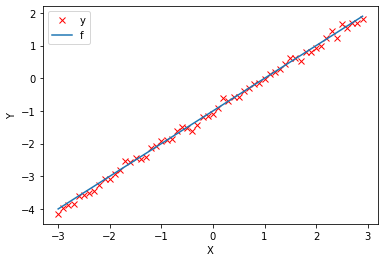

In [5]:
plt.plot(dataset.x.numpy(), dataset.y.numpy(),'rx',label='y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(),label='f')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [6]:
from torch import nn, optim

In [7]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression, self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    
    def forward(self,x):
        yhat = self.linear(x)
        return yhat

In [8]:
criterion=nn.MSELoss()

In [9]:
model=linear_regression(1,1)
optimizer=optim.SGD(model.parameters(),lr=0.1)

In [10]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3636]])),
             ('linear.bias', tensor([0.4957]))])

In [15]:
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [11]:
trainloader=DataLoader(dataset=dataset, batch_size=1)

In [16]:
LOSS=[]
def train_model(epoch):
    for i in range(epoch):
        for x,y in trainloader:
            yhat=model(x)
            loss=criterion(yhat,y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        

In [17]:
train_model(10)

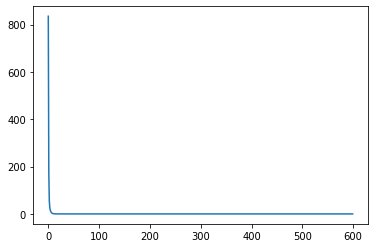

In [18]:
plt.plot(LOSS)